In [5]:
import json
from pathlib import Path
import pandas as pd  
import matplotlib.pyplot as plt

In [6]:
export_path = Path("export.json")

with export_path.open(encoding="utf-8") as fp:
    data = json.load(fp)

users = pd.DataFrame(data["users"])
entries = pd.DataFrame(data["entries"])
daily_exercise_totals = pd.DataFrame(data["daily_exercise_totals"])

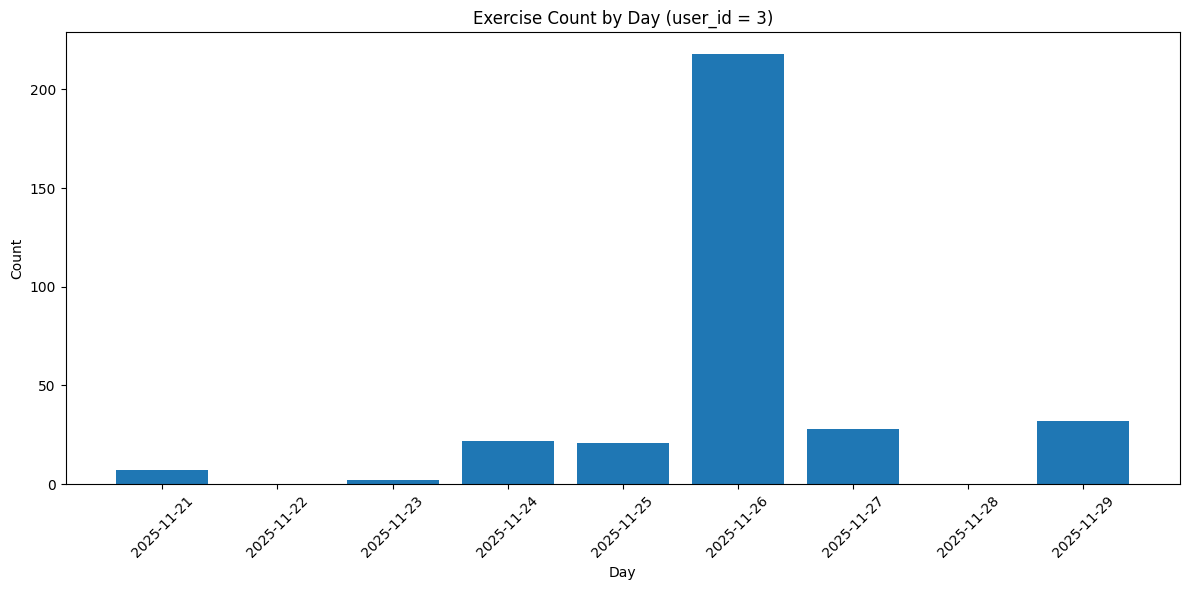

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for user_id == 3
df_user = daily_exercise_totals[daily_exercise_totals["user_id"] == 3].copy()

# Ensure "day" is a datetime column
df_user["day"] = pd.to_datetime(df_user["day"])

# Set the index to day
df_user = df_user.set_index("day")

# Reindex to a full daily date range
full_range = pd.date_range(start=df_user.index.min(), end=df_user.index.max(), freq="D")
df_user = df_user.reindex(full_range, fill_value=0)

# Rename index back to "day"
df_user.index.name = "day"

# Bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_user.index, df_user["count"])
plt.xlabel("Day")
plt.ylabel("Count")
plt.title("Exercise Count by Day (user_id = 3)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



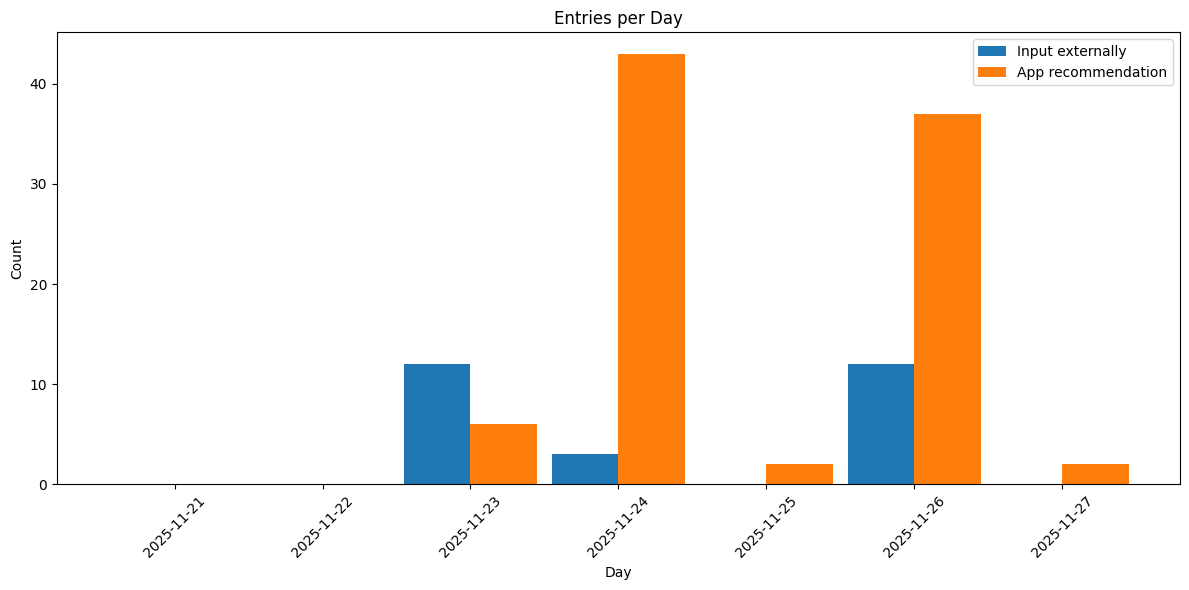

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load entries
entries = pd.DataFrame(data["entries"])

# Filter by user
entries_user = entries[entries["user_id"] == 3].copy()

# Convert created_at → datetime
entries_user["day"] = pd.to_datetime(entries_user["created_at"], format="mixed").dt.date

# Filter only from Nov 21, 2025
start_date = pd.to_datetime("2025-11-21").date()
entries_user = entries_user[entries_user["day"] >= start_date]

# Group by day + is_external_input
daily_counts = (
    entries_user
        .groupby(["day", "is_external_input"])
        .size()
        .unstack(fill_value=0)  # columns: True / False
)

# Build full timeline
full_index = pd.date_range(start_date, daily_counts.index.max(), freq="D").date
daily_counts = daily_counts.reindex(full_index, fill_value=0)

# Prepare side-by-side bars
x = range(len(daily_counts.index))
width = 0.45

plt.figure(figsize=(12, 6))

plt.bar(
    [xi - width/2 for xi in x],
    daily_counts.get(True, 0),
    width=width,
    label="Input externally"
)

plt.bar(
    [xi + width/2 for xi in x],
    daily_counts.get(False, 0),
    width=width,
    label="App recommendation"
)

plt.xlabel("Day")
plt.ylabel("Count")
plt.title("Entries per Day")
plt.xticks(x, daily_counts.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
 entries.to_csv("entries_sorted.csv", encoding="latin-1", index=False)


In [12]:
entries = pd.read_csv("entries_edited.csv",  encoding="latin-1")

In [13]:
entries.head()

,id,user_id,text,translation,notes
0,1,1,phone,telefon,NaN
1,2,1,works,værker,NaN
2,3,1,new word,nyt ord,NaN
3,4,1,ever,nogensinde,NaN
4,5,1,save,gem,NaN


In [15]:
entries_sorted = (
      entries.sort_values(["user_id", "id"], ascending=[True, True])
              .reset_index(drop=True)
  )
entries_sorted["id"] = range(1, len(entries_sorted) + 1)

In [16]:
entries_sorted.head(100)

,id,user_id,text,translation,notes
0,1,1,phone,telefon,NaN
1,2,1,works,værker,NaN
2,3,1,new word,nyt ord,NaN
3,4,1,ever,nogensinde,NaN
4,5,1,save,gem,NaN
...,...,...,...,...,...
89,90,4,Hungry,sulten,NaN
90,91,4,Meatballs,frikadeller,NaN
91,92,4,A little sad about it,lidt ked af det,NaN
92,93,4,too fat,for tyk,NaN


In [17]:
entries_sorted.to_csv("entries_sorted.csv", encoding="latin-1", index=False)